# **Assessing the Impact of Central Bank Speeches on Stock Prices Using LSTM and Sentiment Analysis**

## **Introduction**

This project investigates the influence of **Central Bank speeches** (available on the [BIS website](https://www.bis.org/cbspeeches)) on stock prices by leveraging machine learning techniques. Specifically, we use a **Long Short-Term Memory (LSTM)** model, which is well-suited for capturing long-term trends in stock prices, as its core predictive engine. Additionally, sentiment analysis is incorporated to quantify the psychological impact of these speeches on financial markets.

To ensure a comprehensive analysis, the predictions were conducted on the **most heavily weighted companies within each sector of the S&P 500 index**. This approach provides insights into sector-specific influences and highlights the broader market implications of Central Bank speeches.

---

## **Motivation**

Central Banks play a pivotal role in shaping market expectations and trends through their communications. The tone and sentiment of their speeches can impact investor behavior and, consequently, stock prices. This project aims to understand and quantify this impact using an LSTM model enhanced with sentiment analysis techniques, offering a more comprehensive view than relying solely on price trends.

---

## **Objectives**

1. Evaluate the degree to which **Central Bank speeches** influence stock prices.
2. Compare the performance of models that:
   - Use sentiment analysis algorithms (e.g., **FinBERT** and **skfin**).
   - Do not incorporate sentiment analysis and rely solely on stock price data.
3. Assess the effectiveness of sentiment analysis in improving stock price prediction accuracy using **R² (Coefficient of Determination)** as the primary evaluation metric.

---

## **Methodology**

### **1. Project Structure**
The project is structured around three main axes, corresponding to the types of sentiment analysis used:
1. **FinBERT**: Sentiment analysis using a pre-trained transformer model tailored for financial text.
2. **Loughran-McDonald Dictionary (skfin)**: A rule-based sentiment analysis method for financial content.
3. **Without Sentiment Analysis**: A baseline model relying solely on stock price data.

Each axis includes:
- **Data Preprocessing**: Preparing data specific to the sentiment analysis approach or baseline.
- **Model Training**: Training an LSTM model with the corresponding feature set.
- **Model Evaluation**: Evaluating the model’s performance against its objectives.

Sentiment analysis, when used, is integrated into the preprocessing pipeline for its respective axis.

### **2. Data Collection**
1. **Speeches**:
   - Extracted from the [BIS Central Bank speeches database](https://www.bis.org/cbspeeches) using a Python script built with **Playwright**.
   - Speech content was preprocessed to extract relevant text and aligned with stock price data by date.

2. **Stock Prices**:
   - Historical stock prices (e.g., closing prices and trading volume) were fetched using the **yfinance** API.
   - The dataset focuses on **top S&P 500 companies** by sector weight, providing a broad market view.

3. **Target Companies**:
   - The analysis emphasizes sector-specific insights by selecting the most impactful companies in the S&P 500.


### **3. Sentiment Analysis**
Sentiment analysis is performed within the respective preprocessing pipelines for FinBERT and skfin-based approaches:
- **FinBERT**: Extracted sentiment scores (`positive`, `negative`, `neutral`) for each speech, processed with a transformer model fine-tuned for financial sentiment.
- **Loughran-McDonald Dictionary (skfin)**: Applied rule-based sentiment scoring using a dictionary of sentiment-related terms, aggregating results to align with stock price movements.

Sentiment scores, when used, are integrated into the feature set for training the LSTM model.

### **4. LSTM Model Implementation**
An **LSTM model class** was implemented for stock price prediction. Its architecture includes:
- **Inputs**: 
  - Stock price features (e.g., closing prices, trading volume).
  - Sentiment scores (from FinBERT or skfin) for axes using sentiment analysis.
- **Hidden Layers**: Stacked LSTM layers for sequential learning and fully connected layers for regression.
- **Output**: Predicted stock prices.

The training process includes:
- Batch training using **PyTorch DataLoaders**.
- Optimization with **Adam optimizer**.
- A **learning rate scheduler** for dynamic adjustment.
- **Early stopping** to mitigate overfitting by monitoring validation loss.

### **5. Comparison Models**
The methodology for each axis (FinBERT, skfin, and baseline) comprises:

1. **Data Preprocessing**:
   - Data alignment:
     - Speech dates aligned with stock prices.
     - Sentiment scores aggregated by date where applicable.
   - Scaling features using **MinMaxScaler** for consistent input magnitudes.
   - Constructing input sequences for the LSTM model with a fixed sequence length.

2. **Model Training**:
   - Trained the LSTM model using the respective features:
     - FinBERT sentiment scores combined with stock prices.
     - skfin sentiment scores combined with stock prices.
     - Stock prices only for the baseline.
   - **Mean Squared Error (MSE)** served as the loss function.

3. **Evaluation**:
   - Models were evaluated on unseen test data.
   - Key metrics:
     - **R² (Coefficient of Determination)** to assess explanatory power.
     - **Mean Squared Error (MSE)** to measure prediction error.
   - Visualizations compared predicted stock prices against actual values for qualitative insights.

### **6. Key Observations**
- Sentiment analysis approaches (FinBERT and skfin) provided incremental improvements in certain scenarios, especially for sectors sensitive to speech content.
- The baseline model performed well for companies where stock price movements are largely independent of external sentiment.
- The sequential modeling capabilities of LSTM were critical for capturing temporal dependencies in both price movements and sentiment dynamics.

## **Most Heavily Weighted Companies by Sector in the S&P 500**

The following list highlights the most heavily weighted companies within each sector of the **S&P 500 Index**. These companies are the largest by market capitalization in their respective sectors, significantly influencing sector performance and the overall index.

#### **Most Weighted Companies by Sector**
1. **Information Technology**:  
   - **Apple Inc. (AAPL)**

2. **Consumer Discretionary**:  
   - **Amazon.com Inc. (AMZN)**

3. **Communication Services**:  
   - **Meta Platforms, Inc. Class A (META)**

4. **Health Care**:  
   - **UnitedHealth Group Inc. (UNH)**

5. **Financials**:  
   - **Berkshire Hathaway Inc. Class B (BRK.B)**

6. **Consumer Staples**:  
   - **Procter & Gamble Co. (PG)**

7. **Industrials**:  
   - **Honeywell International Inc. (HON)**

8. **Energy**:  
   - **Exxon Mobil Corp. (XOM)**

9. **Utilities**:  
   - **NextEra Energy, Inc. (NEE)**

10. **Real Estate**:  
    - **American Tower Corp. (AMT)**

---

### **References**
- [SlickCharts - S&P 500 Index Weightings](https://www.slickcharts.com/sp500)  

In [2]:
%pip install -U pyee playwright

  Using cached playwright-1.49.1-py3-none-macosx_11_0_universal2.whl.metadata (3.5 kB)
  Using cached pyee-12.0.0-py3-none-any.whl.metadata (2.8 kB)
Using cached playwright-1.49.1-py3-none-macosx_11_0_universal2.whl (39.6 MB)
Using cached pyee-12.0.0-py3-none-any.whl (14 kB)
  Attempting uninstall: pyee
    Found existing installation: pyee 12.1.1
    Uninstalling pyee-12.1.1:
      Successfully uninstalled pyee-12.1.1
  Attempting uninstall: playwright
    Found existing installation: playwright 1.13.1
    Uninstalling playwright-1.13.1:
      Successfully uninstalled playwright-1.13.1
Note: you may need to restart the kernel to use updated packages.


# Imports Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from torch.optim.lr_scheduler import OneCycleLR
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Utils

In [9]:
def sequencing(df, companies, sequence_length, include_news=False):
    data = []
    for company in companies:
        if include_news:
            if 'neutral' in df.columns:
                company_data = df[df['Company'] == company][['Close', 'negative', 'neutral', 'positive']].values
            else:
                company_data = df[df['Company'] == company][['Close', 'negative', 'positive']].values
            for i in range(company_data.shape[0]):
                sentiment_values = company_data[i, 1:]
                max_index = np.argmax(sentiment_values)
                binary_sentiment = np.zeros_like(sentiment_values)
                binary_sentiment[max_index] = 1
                company_data[i, 1:] = binary_sentiment
            data.append(company_data)
        else:
            company_data = df[df['Company'] == company][['Close']].values
            data.append(company_data)
    sequenced_data = []
    for d in data:
        if d.shape[0] <= sequence_length:
            print(d.shape)
            continue
        for k in range(d.shape[0] - sequence_length):
            sequence = d[k:k + sequence_length, :]
            sequenced_data.append(sequence)
    sequenced_data = np.array(sequenced_data)
    return sequenced_data

In [10]:
def evaluate_model(model, data_loader):
    model.eval()
    predictions = []
    targets = []
    test_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            # Move data to device
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            # Model inference
            outputs = model(x_batch)
            
            # Detach and move to CPU
            preds = outputs.squeeze().cpu().numpy()  # Shape: (batch_size,)
            true_values = y_batch.cpu().numpy()      # Shape: (batch_size,)
            loss = criterion(test_outputs.squeeze(), y_test)
            test_loss += loss.item()
            # Collect predictions and targets
            predictions.extend(preds)
            targets.extend(true_values)
    # Reshape to 2D arrays (scaler expects 2D inputs)
    predictions = np.array(predictions).reshape(-1, 1)
    targets = np.array(targets).reshape(-1, 1)

    scaler = scalers[0]
    # Apply inverse transform
    predictions = scaler.inverse_transform(predictions)
    targets = scaler.inverse_transform(targets)
    return predictions.flatten(), targets.flatten(), test_loss/len(test_loader)

In [11]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx, :-1, :]
        y = self.data[idx, -1, 0]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Scrapping of data
### ⚠️ Warning

This scraping process may take **some time** to complete, depending on:

- The **number of pages** to scrape.
- Your **network speed**.

Please be patient while the program fetches the data.


In [8]:
from bs4 import BeautifulSoup
import pandas as pd
import re
from playwright.async_api import async_playwright
import asyncio
import requests
from tqdm import tqdm

async def get_BIS_press_urls():
    """Scrape all BIS press release URLs and their dates using Playwright's Async API."""
    articles = []  # List to store articles with URLs and dates

    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)  # Launch the browser in headless mode
        page = await browser.new_page()  # Open a new page
        
        for k in tqdm(range(1, 717)):  # Iterate through pages
            url = f"https://www.bis.org/cbspeeches/index.htm?cbspeeches_page={k}"            
            # Navigate to the page
            await page.goto(url)
            await asyncio.sleep(0.5)  # Add a delay to ensure the page fully loads

            # Extract rendered HTML
            html = await page.content()
            soup = BeautifulSoup(html, "html.parser")

            rows = soup.find_all('tr', class_='item')
            for row in rows:
                # Extract the date
                date_cell = row.find('td', class_='item_date')
                date = date_cell.get_text(strip=True) if date_cell else "No date available"
                # Extract the URL
                link = row.find('a', href=re.compile(r"^/review/r\d{6}[a-z]?.htm$"))
                if link and link.get('href'):
                    url = f"https://www.bis.org{link['href']}"
                    title = link.get_text(strip=True)
                else:
                    url = None
                    title = "No title available"

                articles.append({
                    "date": date,
                    "url": url,
                    "title": title
                })

        await browser.close()
    return articles

def get_text_from_url(url):
    """Visit a URL and retrieve the text of all <p> tags."""
    if not url:
        print("Error: No URL provided.")  # Log error for missing URL
        return ""

    # Perform the GET request
    response = requests.get(url, timeout=500)
    if response.status_code != 200:
        print(f"Error fetching content from {url}: Status code {response.status_code}")
        return ""

    soup = BeautifulSoup(response.text, "html.parser")

    # Find all <p> tags on the page
    paragraphs = soup.find_all('p')
    if not paragraphs:
        print(f"No <p> tags found on {url}")
        return ""

    # Combine the text from all <p> tags
    text = " ".join(p.get_text(strip=True) for p in paragraphs)
    return text

def save_to_csv(data, output_file="data/bis_press_releases.csv"):
    """Save data (URLs, dates, titles, and text content) to a CSV file."""
    if not data:
        print("No data found to save.")
        return

    df = pd.DataFrame(data)  # Create a DataFrame with the articles
    df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"Saved {len(data)} entries to '{output_file}'.")

async def main():
    # Scrape press release URLs
    articles = await get_BIS_press_urls()
    print(f"Found {len(articles)} articles. Start scraping content...")

    # Retrieve text content from each URL
    for article in tqdm(articles):
        if article['url']:
            content = get_text_from_url(article['url'])  # Pass only the URL to the function
            article["content"] = content  # Add the retrieved content to the article dictionary
        else:
            print(f"Skipping article with missing URL: {article}")  # Debug: Missing URL

    # Save the articles with content to a CSV
    save_to_csv(articles)

# Run the async main function
if __name__ == "__main__":
    asyncio.run(main())


100%|██████████| 716/716 [12:44<00:00,  1.07s/it]


Found 6900 articles. Start scraping content...


 32%|███▏      | 2232/6900 [04:37<09:10,  8.48it/s]

Skipping article with missing URL: {'date': '21 Jun 2022', 'url': None, 'title': 'No title available'}


 34%|███▍      | 2341/6900 [04:51<09:56,  7.65it/s]

Skipping article with missing URL: {'date': '11 May 2022', 'url': None, 'title': 'No title available'}


 35%|███▍      | 2390/6900 [04:57<06:52, 10.92it/s]

Skipping article with missing URL: {'date': '25 Apr 2022', 'url': None, 'title': 'No title available'}


100%|██████████| 6900/6900 [14:47<00:00,  7.77it/s]


Saved 6900 entries to 'data/bis_press_releases.csv'.


In [19]:
import asyncio
import os
import pandas as pd
import yfinance as yf
from datetime import datetime
from tqdm.asyncio import tqdm

# Function to fetch S&P 500 tickers and companies from Wikipedia
def get_sp500_tickers():
    sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(sp500_url)
    sp500_table = table[0]  # The S&P 500 list is in the first table on the page

    # Dynamically identify the column for tickers and company names
    ticker_column = [col for col in sp500_table.columns if "Ticker" in col or "Symbol" in col][0]
    company_column = [col for col in sp500_table.columns if "Security" in col or "Company" in col][0]

    tickers = sp500_table[ticker_column].tolist()
    companies = sp500_table[company_column].tolist()

    print('Tickers and Companies fetched:', len(tickers))
    return tickers, companies

# Asynchronous wrapper for yf.download
async def async_download(ticker, start_date, end_date):
    loop = asyncio.get_event_loop()
    try:
        data = await loop.run_in_executor(None, lambda: yf.download(ticker, start_date, end_date, progress=False))
        return data
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return None

# Function to fetch data with retries and clean it
async def fetch_with_retries(ticker, company, start_date, end_date, retries=3, delay=1):
    for attempt in range(retries):
        data = await async_download(ticker, start_date, end_date)

        if data is not None and not data.empty:
            # Prepare clean data
            data["Company"] = company
            data = data.reset_index()  # Ensure 'Date' is a column
            data = data[["Date", "Open", "High", "Low", "Close", "Volume", "Company"]]
            data['Date'] = pd.to_datetime(data['Date'])
            data = data.values
            columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Company"]
            data = pd.DataFrame(data, columns=columns)
            return data
        await asyncio.sleep(delay)

    print(f"Failed to fetch data for {ticker} after {retries} retries.")
    return pd.DataFrame()

# Main function to fetch all data
async def fetch_all_data(start_date, end_date, delay_between_requests=0.5):
    tickers, companies = get_sp500_tickers()
    results = []
    with tqdm(total=len(tickers), desc="Fetching data", dynamic_ncols=True) as pbar:
        for ticker, company in zip(tickers, companies):
            raw_data = await fetch_with_retries(ticker, company, start_date, end_date)
            if not raw_data.empty:
                results.append(raw_data)
            await asyncio.sleep(delay_between_requests)
            pbar.update(1)
    return pd.concat(results, ignore_index=True) if results else pd.DataFrame()

# Entry point
if __name__ == "__main__":
    start_date = "2017-01-01"
    end_date = datetime.now().strftime("%Y-%m-%d")

    try:
        print("Fetching S&P 500 data...")
        all_data = asyncio.run(fetch_all_data(start_date, end_date))

        if not all_data.empty:
            print("Data successfully fetched. Converting to DataFrame...")
            all_data["Date"] = pd.to_datetime(all_data["Date"])  # Ensure 'Date' is in datetime format
            all_data = all_data.sort_values(by="Date")  # Sort by date

            # Save the cleaned data to CSV
            os.makedirs("data", exist_ok=True)
            output_file = "data/sp500_prices.csv"
            all_data.to_csv(output_file, index=False)
            print(f"All data saved to '{output_file}'")
        else:
            print("No data was fetched.")
    except KeyboardInterrupt:
        print("Process interrupted by user.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Fetching S&P 500 data...
Tickers and Companies fetched: 502


Fetching data:  12%|█▏        | 60/502 [00:46<05:56,  1.24it/s]


1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Failed to fetch data for BRK.B after 3 retries.


Fetching data:  15%|█▍        | 75/502 [01:01<05:43,  1.24it/s]


1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted
Failed to fetch data for BF.B after 3 retries.


Fetching data: 100%|██████████| 502/502 [06:43<00:00,  1.24it/s]


Data successfully fetched. Converting to DataFrame...
All data saved to 'data/sp500_prices.csv'


![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*7cMfenu76BZCzdKWCfBABA.png)

## **Long Short-Term Memory (LSTM) Neural Network**

LSTM is a type of Recurrent Neural Network (RNN) designed for sequential data, addressing the vanishing gradient problem. It uses **memory cells** and **gates** to manage information over time.

### Key Components
1. **Cell State ($c_t$)**  
   - Serves as a long-term memory.
2. **Hidden State ($h_t$)**  
   - Represents the current output, passed to the next time step.
3. **Gates**:
   - **Forget Gate**: Discards unnecessary information.
   - **Input Gate**: Adds new relevant information.
   - **Output Gate**: Produces the output based on the cell state.
4. **Candidate Values**:  
   - Tanh function proposes updates to the cell state.

### How It Works
- **Input**: At time step $t$, input $x_t$ and previous hidden state $h_{t-1}$ are processed.
- **Gate Operations**:
  - Forget Gate: Decides what to forget.
  - Input Gate: Decides what to add.
- **Cell State Update**: Combines information retained and added.
- **Output**: Produces the new hidden state $h_t$.

## Why Use LSTM on Stock Prices Instead of Returns?

LSTM models are ideal for sequential data and are well-suited for modeling **stock prices** due to their ability to capture long-term trends and patterns. Using stock prices instead of returns ensures that the cumulative information is preserved, enabling the LSTM to learn both short-term fluctuations and long-term dependencies.

### Key Reasons
1. **Trend Recognition**:  
   Stock prices exhibit trends over time, which LSTMs can detect. Returns, on the other hand, are more stationary and lose sequential context.
   
2. **Sequential Dependencies**:  
   LSTMs excel in capturing dependencies over time, which are more pronounced in price series compared to returns.

3. **Prediction Objectives**:  
   Forecasting tasks, such as predicting future price levels, naturally align with stock prices rather than percentage changes (returns).

By using stock prices, the LSTM leverages its strengths in sequence modeling to identify meaningful patterns, making it more effective for stock forecasting.

In [12]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, seed=42):
        super(LSTM, self).__init__()
        
        # Linear layer at the beginning
        self.initial_linear = nn.Linear(input_dim, input_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.seed = seed
        self.init_weights()
    
    def forward(self, x):
        # Pass through the initial linear layer
        x = self.initial_linear(x)
        
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out
    
    def init_weights(self):
        torch.manual_seed(self.seed)
        
        # Initialize weights for the initial linear layer
        nn.init.xavier_uniform_(self.initial_linear.weight.data)
        nn.init.constant_(self.initial_linear.bias.data, 0)

        # Initialize weights for the LSTM layer
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                nn.init.constant_(param.data, 0)

        # Initialize weights for the fully connected layer
        nn.init.xavier_uniform_(self.fc.weight.data)
        nn.init.constant_(self.fc.bias.data, 0)

In [13]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=True, min_delta=1e-4, save_path="best_model.pth"):
        self.patience = patience
        self.verbose = verbose
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.save_path = save_path

    def __call__(self, val_loss, model):
            if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
                # New best loss found, save the model
                self.best_loss = val_loss
                self.counter = 0
                torch.save(model.state_dict(), self.save_path)
                if self.verbose:
                    print(f"Validation loss improved. Model saved to {self.save_path}")
            else:
                # No improvement, increment counter
                self.counter += 1
                if self.verbose:
                    print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True
                    print("Early stopping triggered.")

# **Using Stock Prices Without Sentiment Analysis**

As a baseline for comparison, we trained the LSTM model using only historical stock prices and trading volume as inputs, without incorporating any sentiment analysis. This approach focuses purely on the temporal patterns and trends present in the price data.

#### Key Characteristics:
- **Inputs**: Historical stock prices (e.g., close prices) and trading volume.
- **Goal**: Evaluate the model's ability to predict future prices based solely on market data, without the influence of sentiment-derived features.
- **Purpose**: Serve as a benchmark to assess the added value of sentiment analysis in improving prediction accuracy.

This baseline allows us to isolate the impact of sentiment analysis and measure its contribution to the overall performance of the LSTM model.


## Data processing

In [14]:
num_companies = 10

In [15]:
prices = pd.read_csv('data/sp500_prices.csv')
prices['date'] = pd.to_datetime(prices['Date'])
prices = prices.drop(columns=['Date'])
prices.sort_values(by='date', ascending=True, inplace=True)

In [16]:
dates = prices['date'].drop_duplicates().values
split_date = dates[int(0.8 * len(dates))]

train = prices[prices['date'] <= split_date]
val = prices[prices['date'] > split_date]
num_val_dates = len(val['date'].drop_duplicates().values)

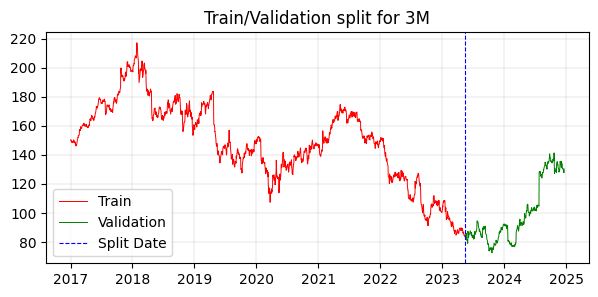

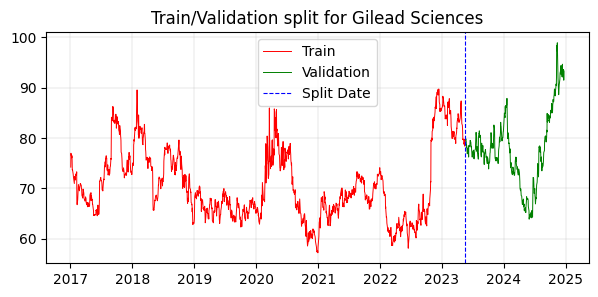

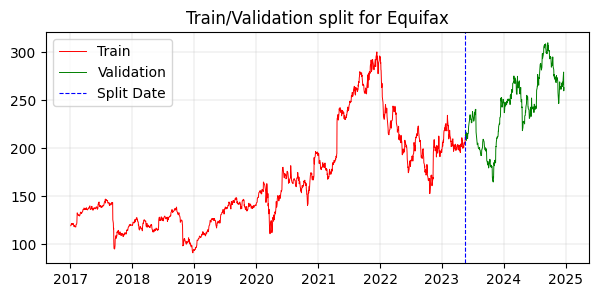

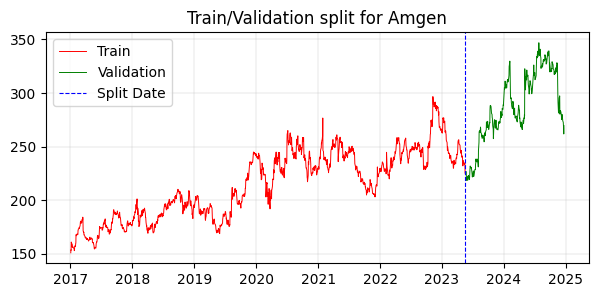

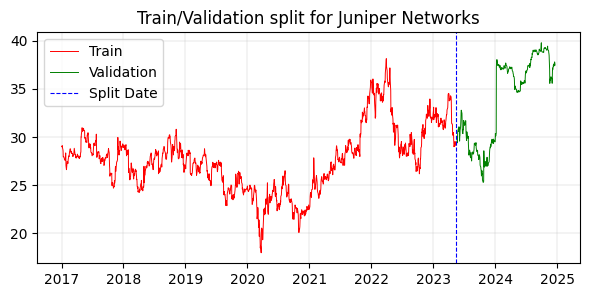

In [17]:
companies = prices['Company'].drop_duplicates().values
for company in companies[:5]:
    train_ex = train[train['Company'] == company]['High'].values
    train_dates = train['date'].drop_duplicates().values
    val_ex = val[val['Company'] == company]['High'].values
    val_dates = val['date'].drop_duplicates().values

    plt.figure(figsize=(7, 3))
    plt.grid(linewidth=0.2)
    plt.plot(train_dates, train_ex, linewidth=0.7, label='Train', c='r')
    plt.plot(val_dates, val_ex, linewidth=0.7, label='Validation', c='g')
    plt.axvline(x=split_date, color='b', linestyle='--', linewidth=0.8, label='Split Date')
    plt.legend()
    plt.title(f'Train/Validation split for {company}')
plt.show()

In [18]:
train_sequence = sequencing(train, companies[:num_companies], 50)
val_sequence = sequencing(val, companies[:num_companies], num_val_dates-1)

print(f'sequenced train data: {train_sequence.shape}')
print(f'sequenced validation data: {val_sequence.shape}')

sequenced train data: (15550, 50, 1)
sequenced validation data: (10, 400, 1)


## Model Training

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data, test_data = train_test_split(train_sequence, test_size=0.2, random_state=42, shuffle=True)
train_data = np.array(train_data)
test_data = np.array(test_data)

num_features = train_data.shape[2]  # Number of features
scalers = [MinMaxScaler(feature_range=(0, 1)) for _ in range(num_features)]

train_data_scaled = np.zeros_like(train_data)
test_data_scaled = np.zeros_like(test_data)

for feature_idx in range(num_features):
    train_feature = train_data[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
    test_feature = test_data[:, :, feature_idx].reshape(-1, 1)
    
    scalers[feature_idx].fit(train_feature)
    
    train_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(train_feature).reshape(train_data.shape[0], -1)
    test_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(test_feature).reshape(test_data.shape[0], -1)

train_data = train_data_scaled
test_data = test_data_scaled

train_dataset = TimeSeriesDataset(train_data)
test_dataset = TimeSeriesDataset(test_data)

generator = torch.Generator()
generator.manual_seed(42)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, generator=generator)

input_dim = train_data.shape[2]
hidden_dim = 256
num_layers = 4
output_dim = 1

learning_rate = 0.01
dropout = 0.2
weight_decay = 1e-4

num_epochs = 256

model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
early_stopping = EarlyStopping(patience=32)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
steps_per_epoch = len(train_loader)  # Total number of batches in one epoch
scheduler = OneCycleLR(
    optimizer,
    max_lr=learning_rate,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch
)

print('Model defined, start training ...')
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.item()
    
    # Testing loop
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            test_outputs = model(x_test)
            loss = criterion(test_outputs.squeeze(), y_test)
            test_loss += loss.item()
    
    # Print metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.8f}, "
          f"Test Loss: {test_loss/len(test_loader):.8f}, LR: {scheduler.get_last_lr()[0]:.6f}")
    
    early_stopping(test_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping triggered at epoch {epoch+1}.")
        break

Model defined, start training ...
Epoch [1/256], Train Loss: 0.00725349, Test Loss: 0.00018159, LR: 0.000404
Validation loss improved. Model saved to best_model.pth
Epoch [2/256], Train Loss: 0.00020375, Test Loss: 0.00020324, LR: 0.000416
EarlyStopping counter: 1 out of 32
Epoch [3/256], Train Loss: 0.00022972, Test Loss: 0.00019790, LR: 0.000436
EarlyStopping counter: 2 out of 32
Epoch [4/256], Train Loss: 0.00024569, Test Loss: 0.00019898, LR: 0.000464
EarlyStopping counter: 3 out of 32
Epoch [5/256], Train Loss: 0.00026175, Test Loss: 0.00022148, LR: 0.000500
EarlyStopping counter: 4 out of 32
Epoch [6/256], Train Loss: 0.00025897, Test Loss: 0.00019783, LR: 0.000544
EarlyStopping counter: 5 out of 32
Epoch [7/256], Train Loss: 0.00031476, Test Loss: 0.00030988, LR: 0.000595
EarlyStopping counter: 6 out of 32
Epoch [8/256], Train Loss: 0.00024032, Test Loss: 0.00024018, LR: 0.000655
EarlyStopping counter: 7 out of 32
Epoch [9/256], Train Loss: 0.00027034, Test Loss: 0.00026331, LR:

KeyboardInterrupt: 

## Model Evaluation

### Reload model

In [14]:
model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
model.load_state_dict(torch.load('best_model.pth'))

C:\Users\mcgpr\AppData\Local\Temp/ipykernel_11100/359333540.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

### Test Set

In [15]:
# Evaluate on test set
predictions, targets, loss = evaluate_model(model, test_loader)
print(f'Loss on test set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Test Set: {r2:.4f}")

Loss on test set: 0.02703758
R² Coefficient on Test Set: 0.9935


### Validation Set

Loss on val set: 0.00055179
R² Coefficient on Validation Set: 0.981146


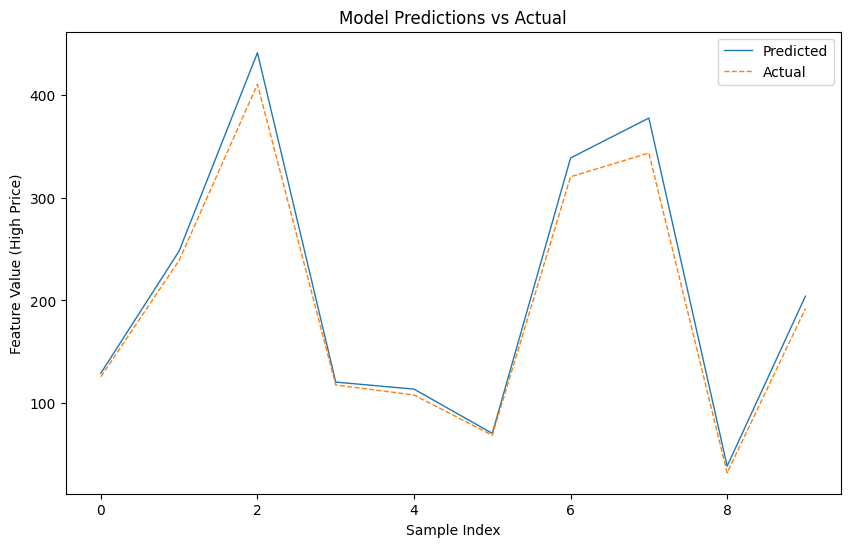

In [16]:
val_data_scaled = np.zeros_like(val_sequence)
for feature_idx in range(num_features):
    feature = val_sequence[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
        
    val_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(feature).reshape(val_sequence.shape[0], -1)

val_data = val_data_scaled
val_dataset = TimeSeriesDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

predictions, targets, loss = evaluate_model(model, val_loader)
print(f'Loss on val set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Validation Set: {r2:.6f}")

window = 600
initial = 4500
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="Predicted", linestyle="-", linewidth=1)
plt.plot(targets, label="Actual", linestyle="--", linewidth=1)
plt.title("Model Predictions vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value (High Price)")
plt.legend()
plt.show()

# **Using Single Company Data and FinBERT Sentiments**

To assess the impact of sentiment analysis, we trained the LSTM model using historical stock prices and sentiment scores derived from **FinBERT**, a financial sentiment analysis tool. The focus was on a single company to evaluate the localized influence of sentiment on price predictions.

#### Key Characteristics:
- **Inputs**:
  - Historical stock prices (e.g., close prices) and trading volume for a single company.
  - Sentiment scores extracted from Central Bank speeches using FinBERT.
- **Goal**: Measure the effectiveness of FinBERT sentiment analysis in capturing psychological and behavioral factors influencing stock prices for a specific company.
- **Purpose**: Evaluate the performance of sentiment-enriched predictions compared to baseline models that rely solely on price data.

This approach highlights the potential of integrating FinBERT-based sentiment analysis for company-specific price forecasting.


In [17]:
news = pd.read_csv('data/bis_press_releases.csv')
news = news.dropna()
news['date'] = pd.to_datetime(news['date'], format='%d %b %Y')
news.sort_values(by='date', ascending=True, inplace=True)

In [18]:
prices = pd.read_csv('data/sp500_prices.csv')
prices['date'] = pd.to_datetime(prices['Date'])
prices = prices.drop(columns=['Date'])
prices.sort_values(by='date', ascending=True, inplace=True)

## Sentiment Analysis Implementation

In [19]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Move the model to CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Get class labels
class_labels = model.config.id2label
prob_labels = model.config.label2id

# Example input text
text1 = news['content'].values[0]

inputs = tokenizer(text1, return_tensors="pt", truncation=True, padding=True)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Perform inference
with torch.no_grad():  # No gradient calculation needed for predictions
    outputs = model(**inputs)

# Compute probabilities and predicted class
probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class = torch.argmax(probs, dim=-1).item()

# Print the results
print("Predicted class:", class_labels[predicted_class])
print("Probabilities:", probs.cpu())  # Move probabilities back to CPU for printing
print('Labels assignation:', prob_labels)

Predicted class: neutral
Probabilities: tensor([[0.1068, 0.2003, 0.6929]])
Labels assignation: {'positive': 0, 'negative': 1, 'neutral': 2}


In [20]:
def sentiment_labelling(df):
    """
    Perform sentiment labelling on the given DataFrame.
    Adds 'negative', 'neutral', and 'positive' columns to the DataFrame.
    Processes the DataFrame to group by date and fill missing values.
    """
    model.to(device)

    df['negative'] = 0.0
    df['neutral'] = 0.0
    df['positive'] = 0.0

    # Initialize the tqdm progress bar
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Sentiment Analysis", dynamic_ncols=True):
        text = row['content']
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to CUDA
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze().tolist()
        df.at[index, 'positive'] = probs[0]
        df.at[index, 'negative'] = probs[1]
        df.at[index, 'neutral'] = probs[2]

    # Drop unnecessary columns
    if {'url', 'title', 'content'}.issubset(df.columns):
        df = df.drop(columns=['url', 'title', 'content'])

    # Group by date and calculate mean sentiment scores
    df = df.groupby("date").mean().reset_index()

    # Ensure the 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Create a full date range
    date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())

    # Reindex to include all dates and forward-fill missing values
    df = df.set_index("date").reindex(date_range)
    df = df.fillna(method="ffill").reset_index()
    df.rename(columns={"index": "date"}, inplace=True)

    df = df.sort_values(by="date", ascending=True).reset_index(drop=True)

    return df

In [21]:
news = sentiment_labelling(news)

Processing Sentiment Analysis: 100%|██████████| 6886/6886 [02:47<00:00, 41.10it/s]


## Data Prepocessing

In [22]:
merged = pd.merge(prices, news, on='date', how='inner')
dates = merged['date'].drop_duplicates().values
split_date = dates[int(0.8 * len(dates))]

train = merged[merged['date'] <= split_date]
val = merged[merged['date'] > split_date]
num_val_dates = len(val['date'].drop_duplicates().values)

In [23]:
merged.head()

,Open,High,Low,Close,Volume,Company,date,negative,neutral,positive
0,13.960000,14.340000,13.950000,14.240000,16160200,Regions Financial Corporation,2017-01-24,0.200346,0.692896,0.106758
1,1678.000000,1719.479980,1678.000000,1700.000000,45200,"NVR, Inc.",2017-01-24,0.200346,0.692896,0.106758
2,39.623909,40.496979,39.469444,40.449966,1372858,Pentair,2017-01-24,0.200346,0.692896,0.106758
3,84.970001,86.580002,84.959999,86.400002,737800,Wabtec,2017-01-24,0.200346,0.692896,0.106758
4,167.160004,169.750000,167.160004,169.509995,600800,Domino's,2017-01-24,0.200346,0.692896,0.106758


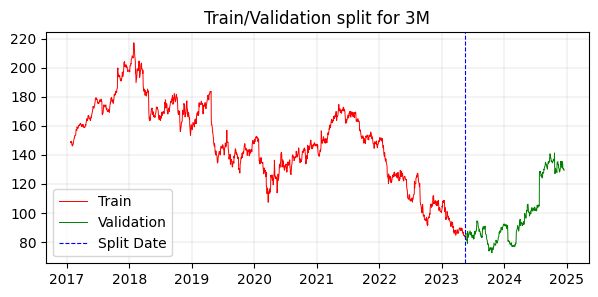

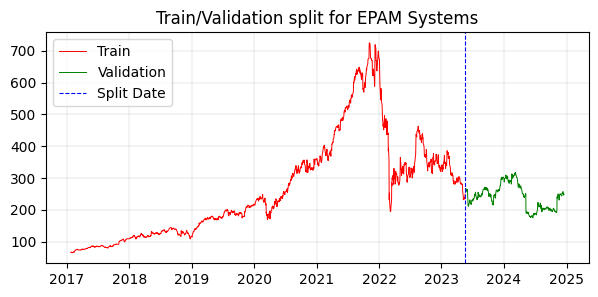

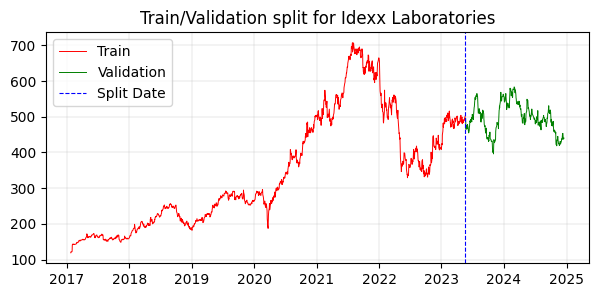

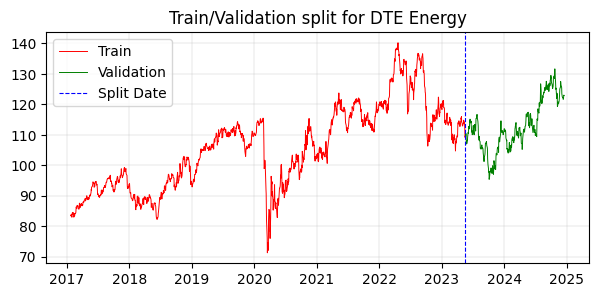

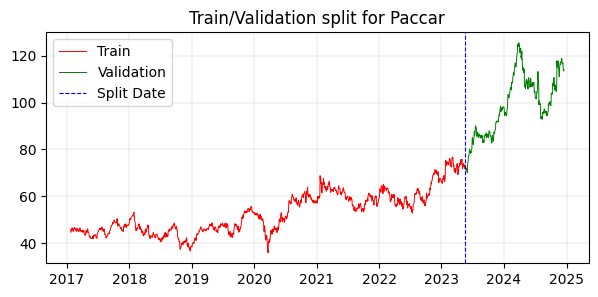

In [24]:
companies = prices['Company'].drop_duplicates().values
for company in companies[:5]:
    train_ex = train[train['Company'] == company]['High'].values
    train_dates = train['date'].drop_duplicates().values
    val_ex = val[val['Company'] == company]['High'].values
    val_dates = val['date'].drop_duplicates().values

    plt.figure(figsize=(7, 3))
    plt.grid(linewidth=0.2)
    plt.plot(train_dates, train_ex, linewidth=0.7, label='Train', c='r')
    plt.plot(val_dates, val_ex, linewidth=0.7, label='Validation', c='g')
    plt.axvline(x=split_date, color='b', linestyle='--', linewidth=0.8, label='Split Date')
    plt.legend()
    plt.title(f'Train/Validation split for {company}')
plt.show()

In [25]:
train_sequence = sequencing(train, companies[:num_companies], 50, include_news=True)
val_sequence = sequencing(val, companies[:num_companies], num_val_dates - 1, include_news=True)

## Model Training

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data, test_data = train_test_split(train_sequence, test_size=0.2, random_state=42, shuffle=True)
train_data = np.array(train_data)
test_data = np.array(test_data)

num_features = train_data.shape[2]  # Number of features
scalers = [StandardScaler() for _ in range(num_features)]

train_data_scaled = np.zeros_like(train_data)
test_data_scaled = np.zeros_like(test_data)

for feature_idx in range(num_features):
    train_feature = train_data[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
    test_feature = test_data[:, :, feature_idx].reshape(-1, 1)
    
    scalers[feature_idx].fit(train_feature)
    
    train_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(train_feature).reshape(train_data.shape[0], -1)
    test_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(test_feature).reshape(test_data.shape[0], -1)

train_data = train_data_scaled
test_data = test_data_scaled

train_dataset = TimeSeriesDataset(train_data)
test_dataset = TimeSeriesDataset(test_data)

generator = torch.Generator()
generator.manual_seed(42)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, generator=generator)

input_dim = train_data.shape[2]
hidden_dim = 256
num_layers = 4
output_dim = 1

learning_rate = 0.01
dropout = 0.2
weight_decay = 1e-4

num_epochs = 256

model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
early_stopping = EarlyStopping(patience=32)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
steps_per_epoch = len(train_loader)  # Total number of batches in one epoch
scheduler = OneCycleLR(
    optimizer,
    max_lr=learning_rate,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch
)

print('Model defined, start training ...')
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.item()
    
    # Testing loop
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            test_outputs = model(x_test)
            loss = criterion(test_outputs.squeeze(), y_test)
            test_loss += loss.item()
    
    # Print metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.8f}, "
          f"Test Loss: {test_loss/len(test_loader):.8f}, LR: {scheduler.get_last_lr()[0]:.6f}")
    
    early_stopping(test_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping triggered at epoch {epoch+1}.")
        break

Model defined, start training ...
Epoch [1/256], Train Loss: 0.06160754, Test Loss: 0.01119587, LR: 0.000404
Validation loss improved. Model saved to best_model.pth
Epoch [2/256], Train Loss: 0.00751440, Test Loss: 0.00450038, LR: 0.000416
Validation loss improved. Model saved to best_model.pth
Epoch [3/256], Train Loss: 0.00611907, Test Loss: 0.00439495, LR: 0.000436
Validation loss improved. Model saved to best_model.pth
Epoch [4/256], Train Loss: 0.00530868, Test Loss: 0.00460886, LR: 0.000464
EarlyStopping counter: 1 out of 32
Epoch [5/256], Train Loss: 0.00556306, Test Loss: 0.00336913, LR: 0.000500
Validation loss improved. Model saved to best_model.pth
Epoch [6/256], Train Loss: 0.00465738, Test Loss: 0.00350436, LR: 0.000544
EarlyStopping counter: 1 out of 32
Epoch [7/256], Train Loss: 0.00458762, Test Loss: 0.00319100, LR: 0.000595
Validation loss improved. Model saved to best_model.pth
Epoch [8/256], Train Loss: 0.00367798, Test Loss: 0.00274621, LR: 0.000655
Validation loss 

## Model Evaluation

### Reload Model

In [27]:
model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
model.load_state_dict(torch.load('best_model.pth'))

C:\Users\mcgpr\AppData\Local\Temp/ipykernel_11100/359333540.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

### Test Set

In [28]:
# Evaluate on test set
predictions, targets, loss = evaluate_model(model, test_loader)
print(f'Loss on test set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Test Set: {r2:.4f}")

Loss on test set: 0.01007720
R² Coefficient on Test Set: 0.9983


### Validation Set

Loss on val set: 0.00020566
R² Coefficient on Validation Set: 0.997744


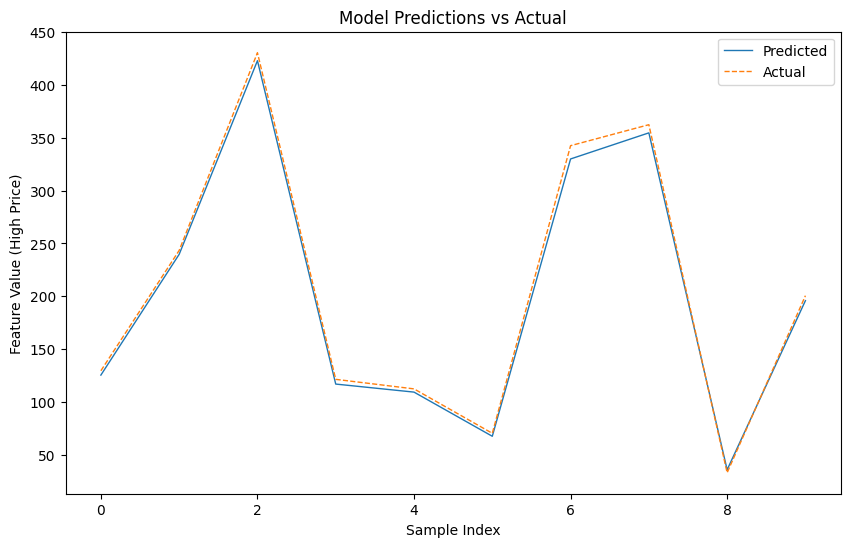

In [29]:
val_data_scaled = np.zeros_like(val_sequence)
for feature_idx in range(num_features):
    feature = val_sequence[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
        
    val_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(feature).reshape(val_sequence.shape[0], -1)

val_data = val_data_scaled
val_dataset = TimeSeriesDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

predictions, targets, loss = evaluate_model(model, val_loader)
print(f'Loss on val set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Validation Set: {r2:.6f}")

window = 600
initial = 4500
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="Predicted", linestyle="-", linewidth=1)
plt.plot(targets, label="Actual", linestyle="--", linewidth=1)
plt.title("Model Predictions vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value (High Price)")
plt.legend()
plt.show()

# **Using Single Company Data with skfin (Loughran-McDonald) Sentiments**

To further explore the impact of sentiment analysis, we trained the LSTM model using historical stock prices and sentiment scores derived from **skfin**, a sentiment analysis tool based on the **Loughran-McDonald dictionary**. This method focuses on a single company to analyze the localized effect of financial sentiment.

#### Key Characteristics:
- **Inputs**:
  - Historical stock prices (e.g., close prices) and trading volume for a single company.
  - Sentiment scores generated using skfin (Loughran-McDonald dictionary) from Central Bank speeches.
- **Goal**: Assess the role of financial sentiment derived from the Loughran-McDonald dictionary in improving stock price predictions.
- **Purpose**: Compare the performance of skfin sentiment-based predictions with baseline and FinBERT-based models.

This approach emphasizes the utility of domain-specific sentiment analysis for company-specific price forecasting.


In [30]:
news = pd.read_csv('data/bis_press_releases.csv')
news = news.dropna()
news['date'] = pd.to_datetime(news['date'], format='%d %b %Y')
news.sort_values(by='date', ascending=True, inplace=True)

In [31]:
prices = pd.read_csv('data/sp500_prices.csv')
prices['date'] = pd.to_datetime(prices['Date'])
prices = prices.drop(columns=['Date'])
prices.sort_values(by='date', ascending=True, inplace=True)

## Sentiment Analysis Implementation

In [32]:
from skfin.datasets import load_loughran_mcdonald_dictionary

In [33]:
lm = load_loughran_mcdonald_dictionary()

INFO:datasets:Loading from cache file: data\Loughran-McDonald_MasterDictionary_1993-2023.csv


In [34]:
def sentiment_labelling(df, lm, column):
    """
    Perform sentiment labelling on the given DataFrame.
    Adds 'negative', 'neutral', and 'positive' columns to the DataFrame.
    Processes the DataFrame to group by date and fill missing values.
    """
    # Initialize sentiment columns
    # Extract the text column
    X = df[column]
    
    # Define sentiment functions
    funcs = {
        "negative": lambda x: x.Negative > 0,
        "positive": lambda x: x.Positive > 0,
        "all": lambda x: x.Word.notna(),
    }

    # Helper function to compute total count for a specific sentiment
    def get_total_count(X, lm, func):
        m = CountVectorizer(vocabulary=lm.loc[func].Word.str.lower().values)
        return pd.DataFrame(m.fit_transform(X).toarray(), index=X.index).sum(axis=1)

    # Compute sentiment counts for each sentiment category
    lm_counts = pd.concat({k: get_total_count(X, lm, v) for k, v in funcs.items()}, axis=1)

    sentiment_columns = ["negative", "positive"]
    lm_counts[sentiment_columns] = lm_counts[sentiment_columns].div(lm_counts[sentiment_columns].sum(axis=1), axis=0)

    lm_counts.drop(columns=["all"], inplace=True)

    if 'date' in df.columns:
        lm_counts['date'] = df['date'].values

    lm_counts.reset_index(drop=True, inplace=True)

    if {'url', 'title', 'content'}.issubset(df.columns):
        df = df.drop(columns=['url', 'title', 'content'])

    lm_counts = lm_counts.groupby("date").mean().reset_index()

    lm_counts['date'] = pd.to_datetime(lm_counts['date'])

    date_range = pd.date_range(start=lm_counts["date"].min(), end=lm_counts["date"].max())

    lm_counts = lm_counts.set_index("date").reindex(date_range)
    lm_counts = lm_counts.fillna(method="ffill").reset_index()
    lm_counts.rename(columns={"index": "date"}, inplace=True)

    lm_counts = lm_counts.sort_values(by="date", ascending=True).reset_index(drop=True)

    return lm_counts

In [35]:
news = sentiment_labelling(news, lm, 'content')

## Data Preprocessing

In [36]:
merged = pd.merge(prices, news, on='date', how='inner')
dates = merged['date'].drop_duplicates().values
split_date = dates[int(0.8 * len(dates))]

train = merged[merged['date'] <= split_date]
val = merged[merged['date'] > split_date]
num_val_dates = len(val['date'].drop_duplicates().values)

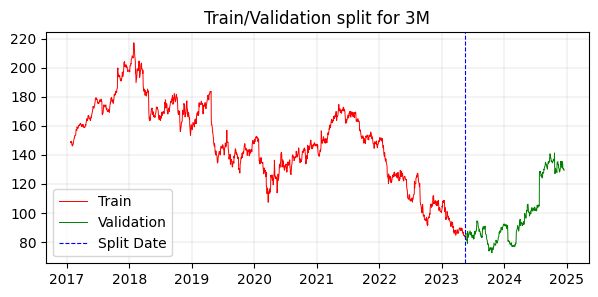

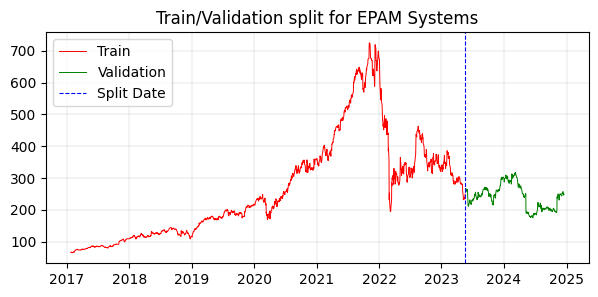

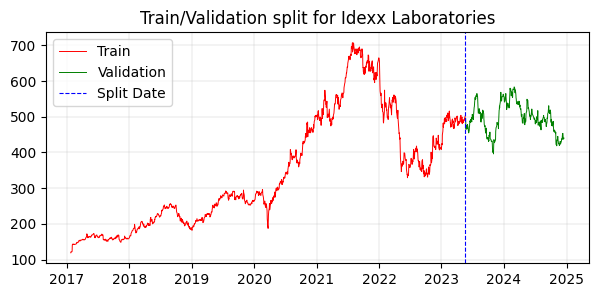

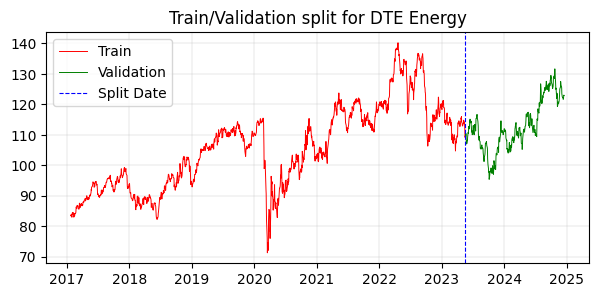

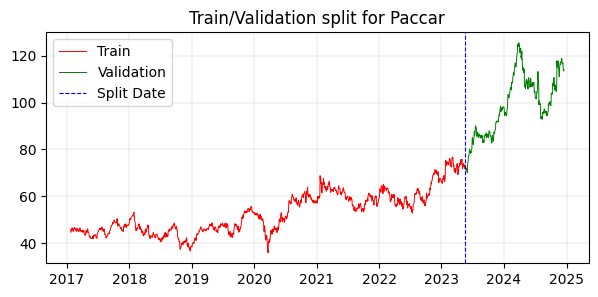

In [37]:
companies = prices['Company'].drop_duplicates().values
for company in companies[:5]:
    train_ex = train[train['Company'] == company]['High'].values
    train_dates = train['date'].drop_duplicates().values
    val_ex = val[val['Company'] == company]['High'].values
    val_dates = val['date'].drop_duplicates().values

    plt.figure(figsize=(7, 3))
    plt.grid(linewidth=0.2)
    plt.plot(train_dates, train_ex, linewidth=0.7, label='Train', c='r')
    plt.plot(val_dates, val_ex, linewidth=0.7, label='Validation', c='g')
    plt.axvline(x=split_date, color='b', linestyle='--', linewidth=0.8, label='Split Date')
    plt.legend()
    plt.title(f'Train/Validation split for {company}')
plt.show()

In [38]:
merged.head(480)

,Open,High,Low,Close,Volume,Company,date,negative,positive
0,13.960000,14.340000,13.950000,14.240000,16160200,Regions Financial Corporation,2017-01-24,0.563636,0.436364
1,1678.000000,1719.479980,1678.000000,1700.000000,45200,"NVR, Inc.",2017-01-24,0.563636,0.436364
2,39.623909,40.496979,39.469444,40.449966,1372858,Pentair,2017-01-24,0.563636,0.436364
3,84.970001,86.580002,84.959999,86.400002,737800,Wabtec,2017-01-24,0.563636,0.436364
4,167.160004,169.750000,167.160004,169.509995,600800,Domino's,2017-01-24,0.563636,0.436364
...,...,...,...,...,...,...,...,...,...
475,81.599998,82.629997,81.529999,82.000000,1814700,Autodesk,2017-01-24,0.563636,0.436364
476,50.119999,50.240002,49.580002,49.650002,6152400,Southwest Airlines,2017-01-24,0.563636,0.436364
477,57.840000,58.189999,57.750000,57.959999,2531900,Intercontinental Exchange,2017-01-25,0.448746,0.551254
478,39.759998,40.470001,39.250000,40.310001,16890200,Abbott Laboratories,2017-01-25,0.448746,0.551254


In [39]:
train_sequence = sequencing(train, companies[:num_companies], 50, include_news=True)
val_sequence = sequencing(val, companies[:num_companies], num_val_dates - 1, include_news=True)

## Model Training

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data, test_data = train_test_split(train_sequence, test_size=0.2, random_state=42, shuffle=True)
train_data = np.array(train_data)
test_data = np.array(test_data)

num_features = train_data.shape[2]  # Number of features
scalers = [StandardScaler() for _ in range(num_features)]

train_data_scaled = np.zeros_like(train_data)
test_data_scaled = np.zeros_like(test_data)

for feature_idx in range(num_features):
    train_feature = train_data[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
    test_feature = test_data[:, :, feature_idx].reshape(-1, 1)
    
    scalers[feature_idx].fit(train_feature)
    
    train_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(train_feature).reshape(train_data.shape[0], -1)
    test_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(test_feature).reshape(test_data.shape[0], -1)

train_data = train_data_scaled
test_data = test_data_scaled

train_dataset = TimeSeriesDataset(train_data)
test_dataset = TimeSeriesDataset(test_data)

generator = torch.Generator()
generator.manual_seed(42)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, generator=generator)

input_dim = train_data.shape[2]
hidden_dim = 256
num_layers = 4
output_dim = 1

learning_rate = 0.01
dropout = 0.2
weight_decay = 1e-4

num_epochs = 256

model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
early_stopping = EarlyStopping(patience=32)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
steps_per_epoch = len(train_loader)  # Total number of batches in one epoch
scheduler = OneCycleLR(
    optimizer,
    max_lr=learning_rate,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch
)

print('Model defined, start training ...')
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.item()
    
    # Testing loop
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            test_outputs = model(x_test)
            loss = criterion(test_outputs.squeeze(), y_test)
            test_loss += loss.item()
    
    # Print metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.8f}, "
          f"Test Loss: {test_loss/len(test_loader):.8f}, LR: {scheduler.get_last_lr()[0]:.6f}")
    
    early_stopping(test_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping triggered at epoch {epoch+1}.")
        break

Model defined, start training ...
Epoch [1/256], Train Loss: 0.05730804, Test Loss: 0.00724420, LR: 0.000404
Validation loss improved. Model saved to best_model.pth
Epoch [2/256], Train Loss: 0.00726579, Test Loss: 0.00445406, LR: 0.000416
Validation loss improved. Model saved to best_model.pth
Epoch [3/256], Train Loss: 0.00572486, Test Loss: 0.00383023, LR: 0.000436
Validation loss improved. Model saved to best_model.pth
Epoch [4/256], Train Loss: 0.00502741, Test Loss: 0.00366229, LR: 0.000464
Validation loss improved. Model saved to best_model.pth
Epoch [5/256], Train Loss: 0.00488505, Test Loss: 0.00396470, LR: 0.000500
EarlyStopping counter: 1 out of 32
Epoch [6/256], Train Loss: 0.00460710, Test Loss: 0.00290527, LR: 0.000544
Validation loss improved. Model saved to best_model.pth
Epoch [7/256], Train Loss: 0.00441023, Test Loss: 0.00383796, LR: 0.000595
EarlyStopping counter: 1 out of 32
Epoch [8/256], Train Loss: 0.00354773, Test Loss: 0.00255887, LR: 0.000655
Validation loss 

## Model Evaluation

### Reload

In [41]:
model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
model.load_state_dict(torch.load('best_model.pth'))

C:\Users\mcgpr\AppData\Local\Temp/ipykernel_11100/359333540.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

### Test Set

In [42]:
# Evaluate on test set
predictions, targets, loss = evaluate_model(model, test_loader)
print(f'Loss on test set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Test Set: {r2:.4f}")

Loss on test set: 0.00906980
R² Coefficient on Test Set: 0.9983


### Validation Set

Loss on val set: 0.00018510
R² Coefficient on Validation Set: 0.999445


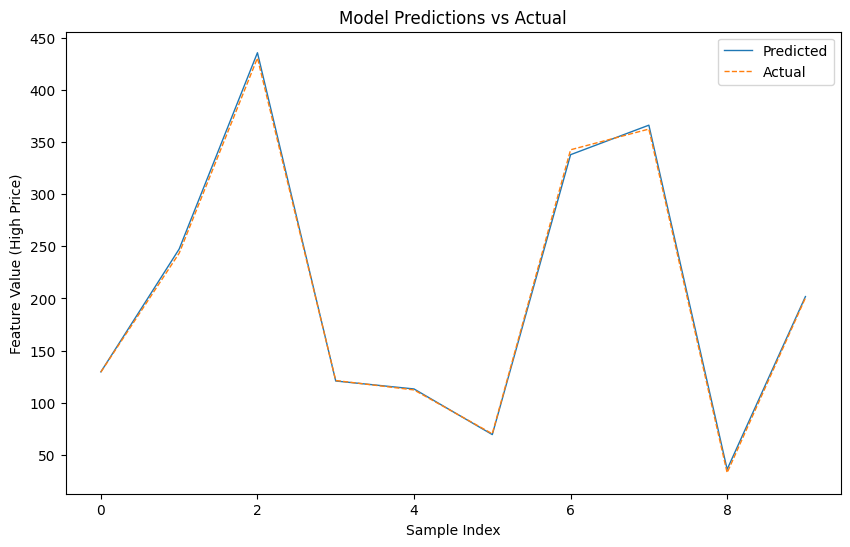

In [43]:
val_data_scaled = np.zeros_like(val_sequence)
for feature_idx in range(num_features):
    feature = val_sequence[:, :, feature_idx].reshape(-1, 1)  # Shape: (num_samples * seq_len, 1)
        
    val_data_scaled[:, :, feature_idx] = scalers[feature_idx].transform(feature).reshape(val_sequence.shape[0], -1)

val_data = val_data_scaled
val_dataset = TimeSeriesDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

predictions, targets, loss = evaluate_model(model, val_loader)
print(f'Loss on val set: {loss:.8f}')
r2 = r2_score(targets, predictions)
print(f"R² Coefficient on Validation Set: {r2:.6f}")

window = 600
initial = 4500
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="Predicted", linestyle="-", linewidth=1)
plt.plot(targets, label="Actual", linestyle="--", linewidth=1)
plt.title("Model Predictions vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value (High Price)")
plt.legend()
plt.show()